## 오픈소스 프로젝트

### 서울시 구별 대여소 및 거치대의 개수

In [2]:
#데이터불러오기 
#cp949 인코딩 사용 한글 데이터 커버
#각종 패키지 불러오기
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
font_path = './NanumGothic.ttf' # 나눔고딕폰트 사용
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False #minus 폰트깨짐 방지

plt.style.use('seaborn')
sns.set(font="NanumGothic", 
rc={"axes.unicode_minus":False}) #seaborn 한글폰트사용

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
Data1 = pd.read_csv('data-set/공공자전거 대여소 정보(21.01.31 기준).csv', encoding = 'cp949')

In [3]:
#데이터 확인 -> 컬럼명 수정 및 결측치 확인한다
Data1.head(10)

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,NaN,LCD
5,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12,NaN,LCD
6,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8,NaN,LCD
7,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7,QR
8,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16,NaN,LCD
9,306.0,광화문역 7번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.570808,126.976433,2015-10-07,19,NaN,LCD


In [4]:
#컬럼 가공
#컬럼명 변경(Unnamed -> 이름 붙여준다)
Data1.columns = ['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', '거치대수lcd', '거치대수qr', '운영방식']

#불필요 칼럼 제거 (상세주소, 운영방식 컬럼은 불필요)
Data1 = Data1.drop(['상세주소', '운영방식'], axis = 1, inplace = False)

In [5]:
#결측치 처리 (qr, lcd 결측치0으로 변경, 대여소번호 ==Nan 삭제)
Data1['거치대수lcd'] = Data1['거치대수lcd'].fillna(0) 
Data1['거치대수qr'] = Data1['거치대수qr'].fillna(0)
Data1 = Data1.dropna(subset=['대여소번호'])
Data1 = Data1.dropna(subset=['위도'])
Data1 = Data1.dropna(subset=['설치시기'])
#거치대수로 통일 및 형변환
Data1['거치대수lcd'] = pd.to_numeric(Data1['거치대수lcd'])
Data1['거치대수qr'] = pd.to_numeric(Data1['거치대수qr'])
Data1['거치대수'] = Data1['거치대수qr'] + Data1['거치대수lcd']

Data1 = Data1.drop(['거치대수qr', '거치대수lcd'], axis = 1, inplace = False)

Data1.head()

,대여소번호,대여소명,자치구,위도,경도,설치시기,거치대수
4,301.0,경복궁역 7번출구 앞,종로구,37.575794,126.971451,2015-10-07,16
5,302.0,경복궁역 4번출구 뒤,종로구,37.575947,126.974060,2015-10-07,12
6,303.0,광화문역 1번출구 앞,종로구,37.571770,126.974663,2015-10-07,8
7,304.0,광화문역 2번출구 앞,종로구,37.572113,126.977577,2021-01-26,7
8,305.0,종로구청 옆,종로구,37.572582,126.978355,2015-10-07,16


In [6]:
#결측치 제거 확인
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 4 to 2157
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2040 non-null   float64
 1   대여소명    2040 non-null   object 
 2   자치구     2040 non-null   object 
 3   위도      2040 non-null   object 
 4   경도      2040 non-null   object 
 5   설치시기    2040 non-null   object 
 6   거치대수    2040 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 127.5+ KB


* 자치구별 거치대 개수 

In [7]:
#자치구별 거치대 개수 데이터 그룹핑
Group_Holder = Data1.groupby('자치구')['거치대수'].sum()
Group_Holder.sort_values(ascending = False, inplace = True) 
Holder = pd.DataFrame(Group_Holder)
Holder.reset_index(inplace = True)
Holder.head() 

,자치구,거치대수
0,송파구,1720
1,강서구,1677
2,서초구,1591
3,강남구,1482
4,영등포구,1475


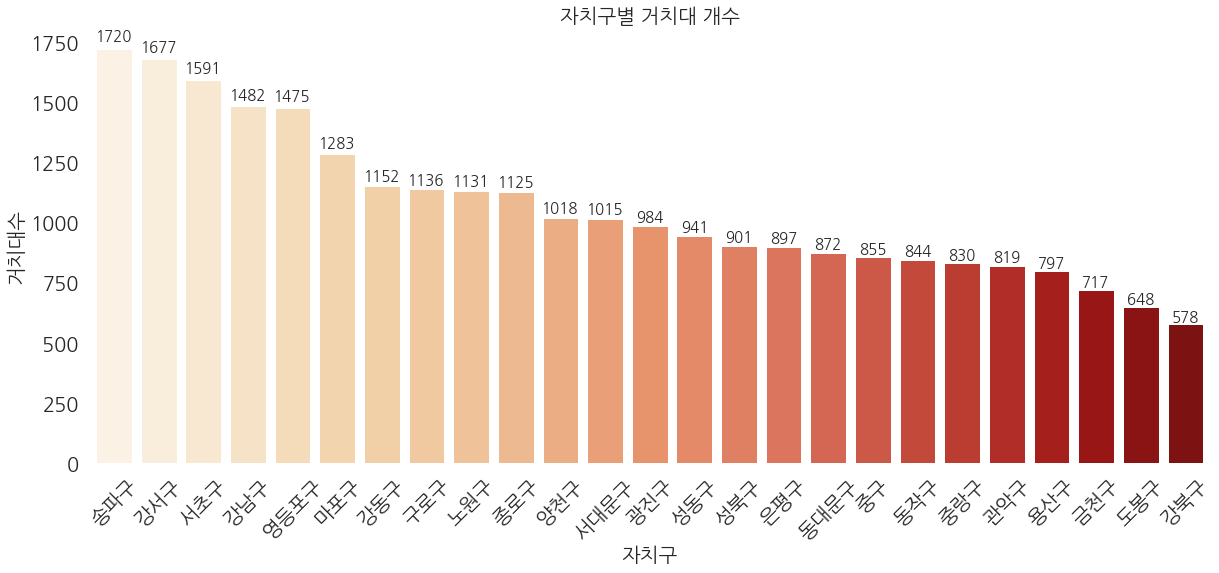

In [8]:
#거치대 개수 시각화
plt.figure(figsize = (20, 8))
ax = sns.barplot(data = Holder, x = '자치구', y = '거치대수', palette = 'OrRd')

#막대 위에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height * 1.02, '%d'%(height), ha = 'center', size = 15)

#각종 폰트 크기 조정
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, size = 20)
plt.xlabel('자치구', fontsize = 20)
plt.ylabel('거치대수', fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('자치구별 거치대 개수' , size = 20)
plt.box(False)
plt.show()

* 자치구별 대여소 개수

In [9]:
#자치구별 대여소 개수 데이터 그룹핑
Group_Rental = Data1.groupby(by = ['자치구']).size()
Group_Rental.sort_values(ascending = False, inplace = True)
Rental = pd.DataFrame(Group_Rental)
Rental.reset_index(inplace = True)
Rental.columns = ['자치구', '대여소수']
Rental.head()

,자치구,대여소수
0,송파구,129
1,강서구,120
2,강남구,118
3,서초구,118
4,영등포구,106


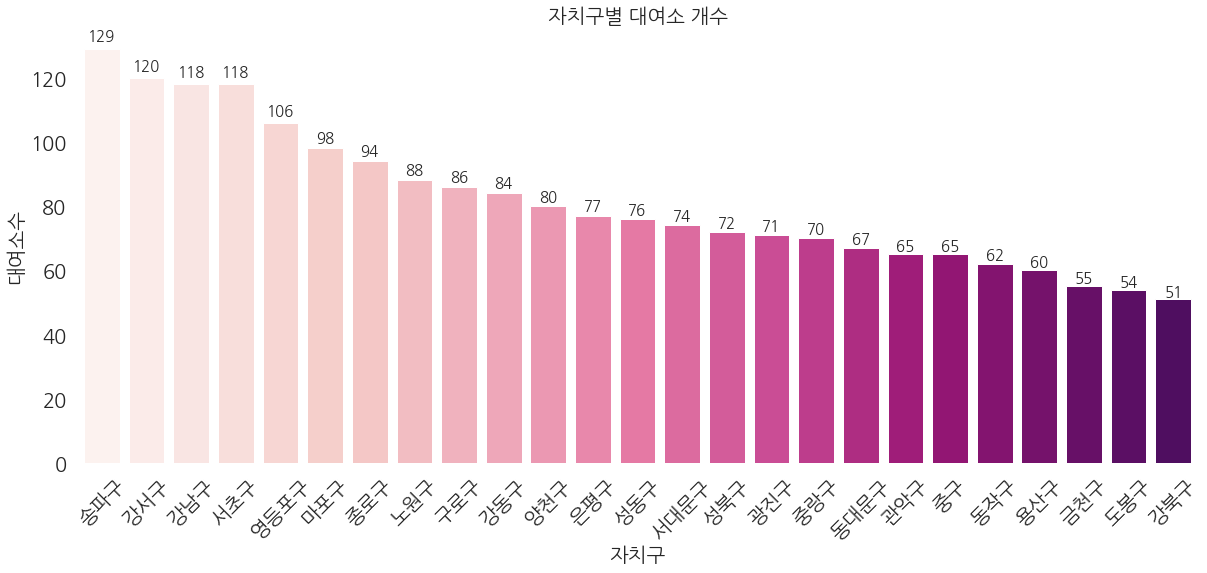

In [10]:
#대여소 개수 시각화
plt.figure(figsize = (20, 8))
ax1 = sns.barplot(data = Rental, x = '자치구', y = '대여소수', palette = 'RdPu')

for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2, height * 1.02, '%d'%(height), ha = 'center', size = 15)

#폰트 및 x축 y축 표시 조정
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 45, size = 20)
plt.xlabel('자치구', fontsize = 20)
plt.ylabel('대여소수', fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('자치구별 대여소 개수' , size = 20)
plt.box(False)
plt.show()

* 지역별 설치 개수 변화

In [11]:
#설치시기 분류
Data1['설치시기'] = pd.to_datetime(Data1['설치시기']) #날짜 형식 변환
Data1['년'] = Data1['설치시기'].dt.year #년, 월 컬럼 추가
Data1['월'] = Data1['설치시기'].dt.month
Data1.head()

,대여소번호,대여소명,자치구,위도,경도,설치시기,거치대수,년,월
4,301.0,경복궁역 7번출구 앞,종로구,37.575794,126.971451,2015-10-07,16,2015,10
5,302.0,경복궁역 4번출구 뒤,종로구,37.575947,126.974060,2015-10-07,12,2015,10
6,303.0,광화문역 1번출구 앞,종로구,37.571770,126.974663,2015-10-07,8,2015,10
7,304.0,광화문역 2번출구 앞,종로구,37.572113,126.977577,2021-01-26,7,2021,1
8,305.0,종로구청 옆,종로구,37.572582,126.978355,2015-10-07,16,2015,10


In [12]:
#대여소 설치 개수 변화 년, 월 기준 그룹핑
#히트맵형식 시각화를 위해 피벗테이블 형식 데이터표현
Pvt_Rental = Data1.pivot_table(index=['자치구'], columns=['년', '월'], values='대여소명', aggfunc = 'nunique', fill_value = 0)
Pvt_Rental.head()

년   2015    2016       2017                 ... 2020                          \
월     9  10   6  7  9    4   5   6  7   8   ...   4  5  6  7  8  9  10 11 12   
자치구                                         ...                                
강남구    0  0    0  0  0    0   0  43  0  13  ...    0  0  0  0  1  0  0  1  2   
강동구    0  0    0  0  0   20   0   0  0   0  ...    0  0  0  0  0  1  0  0  0   
강북구    0  0    0  0  0    0   9   6  0   1  ...    0  0  0  1  0  0  0  0  0   
강서구    0  0    0  0  0   29   0   7  0   1  ...    0  1  0  0  0  0  0  0  2   
관악구    0  0    0  0  0    0  18   6  1   4  ...   16  0  0  0  0  0  1  0  0   

년   2021  
월     1   
자치구       
강남구    0  
강동구    0  
강북구    1  
강서구    0  
관악구    0  

[5 rows x 48 columns]

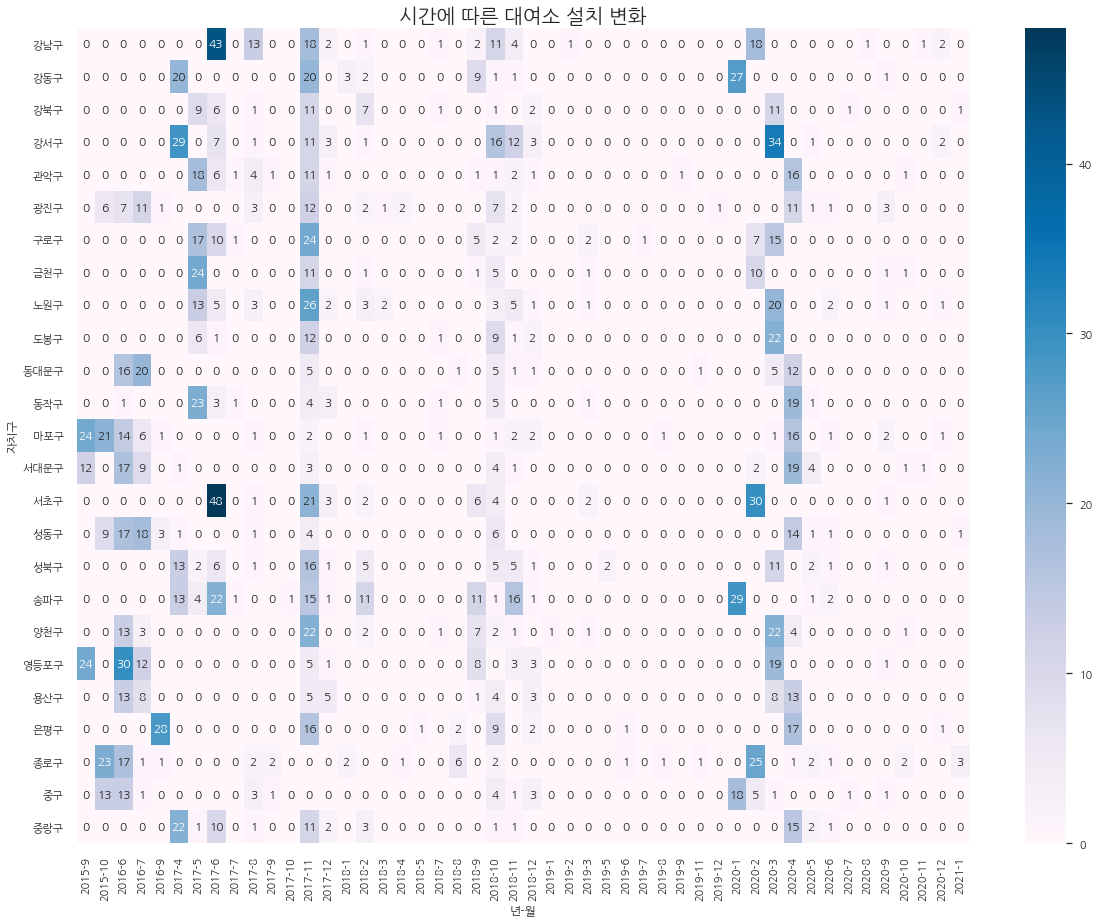

In [13]:
#대여소 변화 히트맵 시각화
plt.figure(figsize = (20 , 15))
ax3 = sns.heatmap(Pvt_Rental, cbar = True, annot = True, cmap = 'PuBu')
plt.title('시간에 따른 대여소 설치 변화', fontsize = 20)
plt.show()

* 지역별 대여소당 평균 거치대수

In [14]:
#거치대수/ 대여소수를 통해 평균 거치대수를 구한다
Rent_per_Hold = Rental
Rent_per_Hold['거치대수'] = Holder['거치대수']
Rent_per_Hold['평균'] = Rent_per_Hold['거치대수'] / Rent_per_Hold['대여소수']

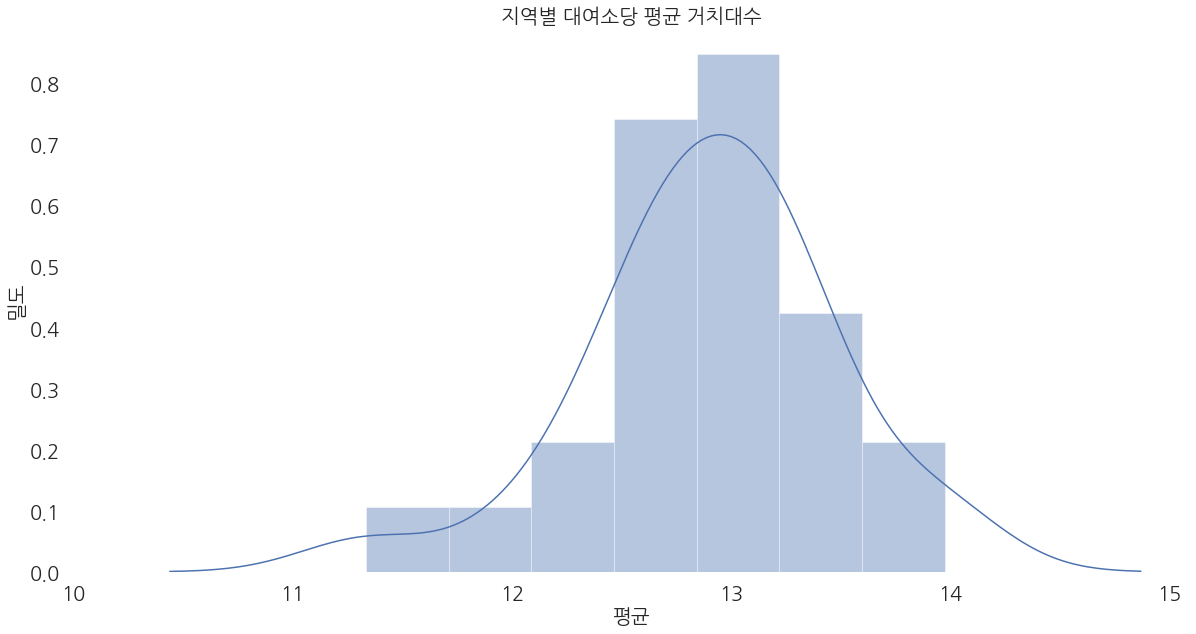

In [15]:
#시각화
plt.figure(figsize = (20, 10))
ax2 = sns.distplot(Rent_per_Hold['평균'])
plt.title('지역별 대여소당 평균 거치대수', size = 20)
plt.xlabel('평균', size = 20)
plt.ylabel('밀도', size = 20)
plt.xticks(range(10,16), fontsize = 20)
plt.yticks(fontsize = 20)
plt.box(False)
plt.show()

* 대여소 분포

In [23]:
#위도 경도 이용해서 대여소간 분포 파악
#위/경도 이용한 두 대여소 간 거리 표현 -> 대여소의 밀집도 파악
#자치구 별로 대여소 위도/경도 페어 구하기
#haversine(a위도/경도, b위도/경도) -> a,b 거리 반환 라이브러리

from haversine import haversine
New_Data1 = pd.DataFrame(Data1)
New_Data1.drop(columns = ['대여소명', '설치시기', '거치대수', '년', '월'], inplace=True) #불필요 컬럼 제거
New_Data1['위도'] = pd.to_numeric(Data1['위도']) #위/경도 계산위해서 형변환
New_Data1['경도'] = pd.to_numeric(Data1['경도'])
Group = New_Data1.groupby(by = ['자치구']) #구별로 그룹핑

dist_dict = {} # key : 자치구 , value : 대어소 간 거리
min_list = []
dist_list = []
for place, df in Group:
    for i, i_row in df.iterrows():
        if len(dist_list) != 0: 
            min_list.append(min(dist_list))
        dist_list = [] #initalize
        for j, j_row in df.iterrows(): # 한 대여소 Fix후 그 외의 대여소와의 거리 순회
            if i == j: #동일 지점 생략
                continue
            i_location = (i_row['위도'], i_row['경도'])
            j_location = (j_row['위도'], j_row['경도'])
            distance = haversine(i_location, j_location, unit = 'm') # m단위 거리 산출
            dist_list.append(distance)  
    dist_dict[place] = min_list #dict 값 추가
    min_list = [] # 가장 가까운 대여소 페어간의 거리를 저장 & initalize

res = pd.DataFrame.from_dict(dist_dict, orient='index') # 배열길이 서로 달라 길이 보정
res = res.transpose()
res

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,648.478724,89.452244,382.479368,163.732516,315.516897,52.438924,189.992512,150.559690,395.511672,116.942589,...,505.400576,218.972884,44.585210,258.730568,73.058882,70.436133,74.746232,161.742789,46.877732,63.112723
1,167.702984,243.524052,119.350129,353.250853,222.978905,94.391413,344.401176,138.038600,263.433661,190.832090,...,332.112143,49.519046,138.932530,159.551414,106.408595,307.186585,190.852125,159.356316,461.904111,199.521453
2,685.716271,150.515832,43.187999,399.330227,255.918728,284.874167,408.762168,348.285311,416.703740,238.140268,...,38.525265,114.255548,193.011615,272.189865,116.489445,276.039031,55.870842,230.552620,251.968052,579.045901
3,254.607676,150.515832,268.500297,392.303909,1409.773581,197.504518,60.607067,443.249826,400.948604,142.856286,...,233.715298,255.877670,83.663383,219.102151,250.559821,233.981894,176.471055,189.147853,223.554834,42.732423
4,236.104079,292.871155,287.792950,491.141891,267.697072,137.804725,345.406380,270.863228,113.036209,60.357687,...,112.961574,132.421982,612.957975,79.761356,148.449921,118.594643,259.123783,86.145263,224.946949,253.937180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,136.588944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,357.418667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,136.588944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,201.228169,NaN,NaN,NaN,NaN,NaN,NaN,NaN


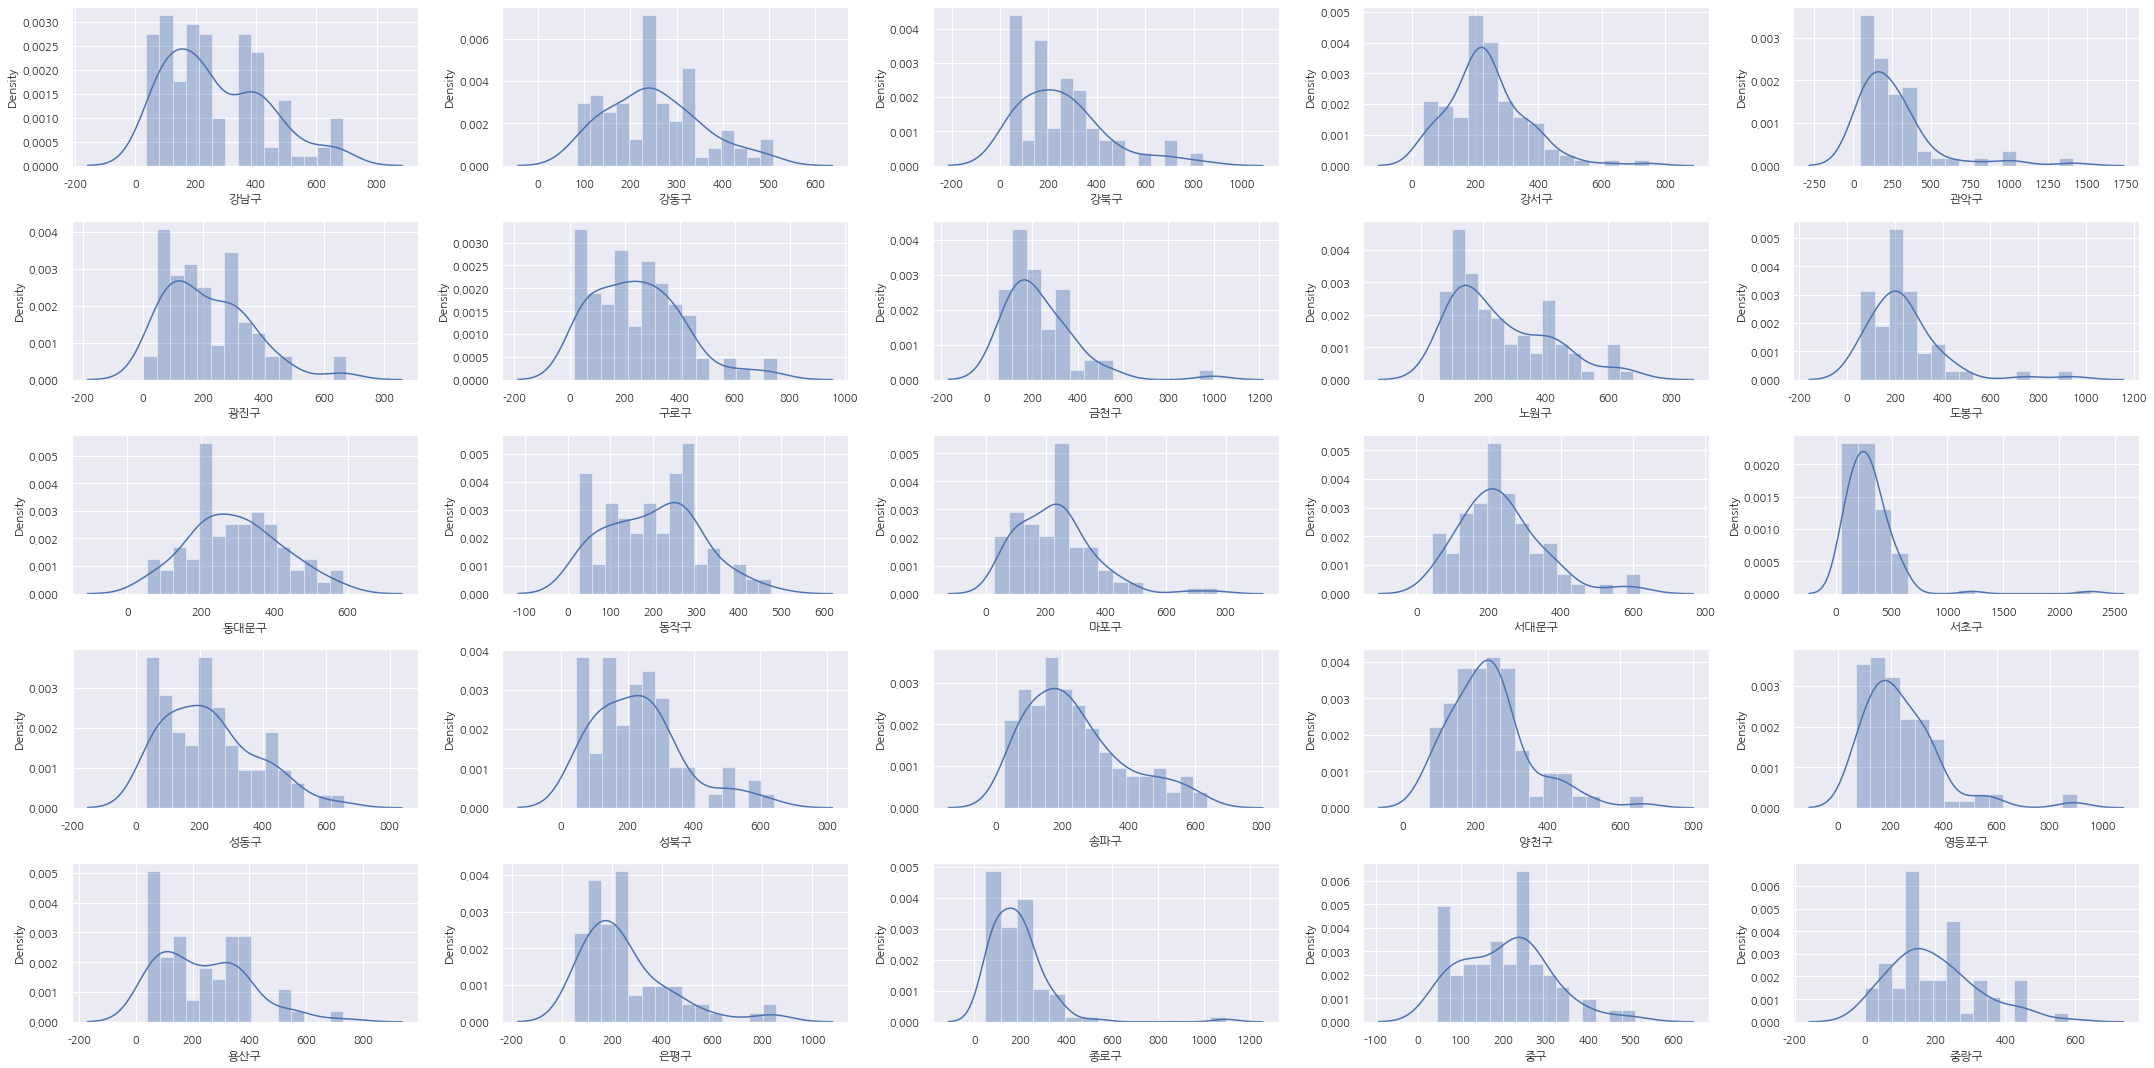

In [24]:
#시각화
fig, ax = plt.subplots(5, 5, figsize = (30, 15))
i, j = 0, 0

for location, n_row in res.iteritems():
    sns.distplot(n_row, ax = ax[i][j], bins = 15)
    j += 1
    if j >= 5:
        i += 1
        j = 0

plt.tight_layout()
plt.show()

### 서울시 구별로 이용량

* 시간에 따른 구별 이용량 변화

In [46]:
# 대여소별 이용정보 추후에 18~21년까지 이용정보 데이터 셋 병합 후 업로드 예정  
Data2 = pd.read_csv('data-set/대여소별 이용정보(21.7-21.12).csv', encoding = 'cp949')

In [47]:
# 서울시 구별로 거치대 개수와 대여건수 (2)